<a href="https://colab.research.google.com/github/Medynal/Pollution/blob/main/pollution_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project analyses air quality data from major cities in India between 2015 and 2020 to understand pollution trends and predict air quality levels. The dataset includes key pollutants such as PM2.5, PM10, NO₂, SO₂, CO, O₃, and related compounds, along with the Air Quality Index (AQI) and AQI categories.

The project involves data cleaning, exploratory data analysis, feature engineering, and machine learning modeling to predict AQI and AQI categories. Pollutant levels, patterns and correlations are visualised and and a streamlit application to predict future AQI and AQI index using models trained by the dataset. project documentations are managed using GitHub

In [57]:
#import os to to access dataset from github
import os

repo_url = "https://github.com/Medynal/Pollution.git"
folder_path = "/content/Pollution"

if not os.path.exists(folder_path):
  !git clone {repo_url} {folder_path}
print(f"Current working directory: {os.getcwd()}")


Current working directory: /content


In [58]:
%ls

cleaned_pollution_dataset.csv  Pollution/  sample_data/


In [59]:
# importing the necessary libraries for data analysis
#import pandas and numpy for Data cleaning and analysis
#matplotlib, plotly and seaborn for visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [60]:
#extracting the datasets into a list
pollution_dataset= '/content/Pollution/data_folder'
dataframes = []
for filename in os.listdir(pollution_dataset):
    if filename.endswith('.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(pollution_dataset, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        dataframes.append(df)  # Add the DataFrame to the list

In [61]:
#concatenating Datasets
pollution_df = pd.concat(dataframes, ignore_index=True)
pollution_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Guwahati,16/02/2019,124.77,187.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Guwahati,17/02/2019,50.82,118.01,4.03,9.30,16.56,29.24,0.48,14.03,17.67,1.07,NaN,NaN,92.0,Satisfactory
2,Guwahati,18/02/2019,58.31,85.39,3.67,10.82,17.63,23.60,0.47,14.47,33.85,0.88,NaN,NaN,122.0,Moderate
3,Guwahati,19/02/2019,59.88,78.04,3.16,9.65,15.51,19.03,0.51,16.42,41.23,1.00,NaN,NaN,80.0,Satisfactory
4,Guwahati,20/02/2019,55.61,92.36,2.89,11.71,17.30,16.68,0.49,27.07,44.89,0.98,NaN,NaN,105.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Hyderabad,27/06/2020,23.29,44.20,6.38,22.64,15.39,9.34,0.36,5.39,24.22,0.88,6.72,0.95,58.0,Satisfactory
29527,Hyderabad,28/06/2020,15.80,32.18,5.79,22.73,14.89,11.09,0.36,6.36,22.25,0.82,6.48,1.11,49.0,Good
29528,Hyderabad,29/06/2020,20.24,44.74,3.96,27.59,17.09,13.09,0.38,6.29,19.98,1.31,10.83,2.71,47.0,Good
29529,Hyderabad,30/06/2020,19.38,41.95,2.63,24.58,14.59,10.80,0.39,5.30,17.40,1.45,13.07,2.51,46.0,Good


In [62]:
#Handling Duplicates
duplicate= pollution_df.duplicated().sum()
if duplicate > 0:
  pollution_df.drop_duplicates(inplace= True)
  print(f'{duplicate} duplicates have been removed')
else:
  print('No duplicates found')

No duplicates found


In [63]:
#check for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum() # Total missing values
    mis_val_percent = 100 * mis_val / len(df)  # Percentage of missing values
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)  # Sort the table by percentage of missing descending
    return mis_val_table

missing_values = missing_values_table(pollution_df)
display(missing_values.style.background_gradient(cmap='Blues'))

,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [64]:
missing_values_per_city = pollution_df.groupby('City').apply(lambda x: x.isnull().sum())
missing_values_per_city

/tmp/ipython-input-287144263.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,,
Ahmedabad,0,0,628,1602,609,608,594,2009,609,640,685,483,483,484,675,675
Aizawl,0,0,2,1,0,0,0,0,0,0,9,15,15,113,2,2
Amaravati,0,0,59,55,55,55,55,55,97,65,55,75,75,269,110,110
Amritsar,0,0,128,63,93,44,289,42,76,168,115,195,212,213,95,95
Bengaluru,0,0,146,360,6,6,4,203,11,6,144,266,93,2009,99,99
Bhopal,0,0,9,9,9,9,9,9,9,9,9,289,289,289,11,11
Brajrajnagar,0,0,185,173,243,234,175,226,150,193,203,173,938,938,225,225
Chandigarh,0,0,15,0,4,4,4,10,0,0,0,0,0,0,5,5
Chennai,0,0,117,1707,36,36,36,462,25,36,49,285,253,2009,125,125


**Missing Value Analysis**

The dataset shows significant variation in the proportion of missing values across different pollutants and target variables:

High missingness (>50%):

Xylene – 61.32% missing

Moderate missingness (20–40%):

PM10 – 37.72%

NH3 – 34.97%

Toluene – 27.23%

Lower missingness (10–20%):

Benzene – 19.04%

AQI and AQI_Bucket – 15.85%

PM2.5 – 15.57%

NOx – 14.17%

O3 – 13.62%

SO2 – 13.05%

NO2 – 12.14%

NO – 12.13%

Minimal missingness (<10%):

CO – 6.97%

No missing values:

Date and City

**Observations:**

Xylene, PM10, NH3, and Toluene have the highest missing percentages, indicating sparse monitoring or inconsistent recording for these pollutants across cities.

Target variables (AQI and AQI_Bucket) have ~15–16% missing values, which may impact supervised learning unless handled properly.

Missing values vary significantly by city: for example, Ahmedabad and Mumbai have higher counts for certain pollutants, whereas cities like Aizawl and Guwahati have very sparse measurements.

**Implications for analysis:**

Imputation strategies are necessary, especially for features with moderate missingness.

Options include mean/median imputation, forward/backward filling for time series, or model-based imputation.

Features with extremely high missingness (e.g., Xylene) may need to be excluded or treated cautiously to avoid bias.

For machine learning modeling, careful handling of missing AQI and AQI_Bucket values is critical since they are the prediction targets.

**Next steps:**

Visualize missingness by city and pollutant to identify patterns.

Decide on imputation vs exclusion for each variable based on missing percentage and importance.

Ensure imputation methods respect temporal and spatial dependencies in the data.

In [65]:
# calculate percentage missingness in each city
missing_values_per_city_percent= pollution_df.groupby('City').apply(lambda x: round(x.isnull().sum() *100 /len(x),2))
missing_values_per_city_percent

/tmp/ipython-input-430516934.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,,
Ahmedabad,0.0,0.0,31.26,79.74,30.31,30.26,29.57,100.00,30.31,31.86,34.10,24.04,24.04,24.09,33.60,33.60
Aizawl,0.0,0.0,1.77,0.88,0.00,0.00,0.00,0.00,0.00,0.00,7.96,13.27,13.27,100.00,1.77,1.77
Amaravati,0.0,0.0,6.20,5.78,5.78,5.78,5.78,5.78,10.20,6.83,5.78,7.89,7.89,28.29,11.57,11.57
Amritsar,0.0,0.0,10.48,5.16,7.62,3.60,23.67,3.44,6.22,13.76,9.42,15.97,17.36,17.44,7.78,7.78
Bengaluru,0.0,0.0,7.27,17.92,0.30,0.30,0.20,10.10,0.55,0.30,7.17,13.24,4.63,100.00,4.93,4.93
Bhopal,0.0,0.0,3.11,3.11,3.11,3.11,3.11,3.11,3.11,3.11,3.11,100.00,100.00,100.00,3.81,3.81
Brajrajnagar,0.0,0.0,19.72,18.44,25.91,24.95,18.66,24.09,15.99,20.58,21.64,18.44,100.00,100.00,23.99,23.99
Chandigarh,0.0,0.0,4.93,0.00,1.32,1.32,1.32,3.29,0.00,0.00,0.00,0.00,0.00,0.00,1.64,1.64
Chennai,0.0,0.0,5.82,84.97,1.79,1.79,1.79,23.00,1.24,1.79,2.44,14.19,12.59,100.00,6.22,6.22


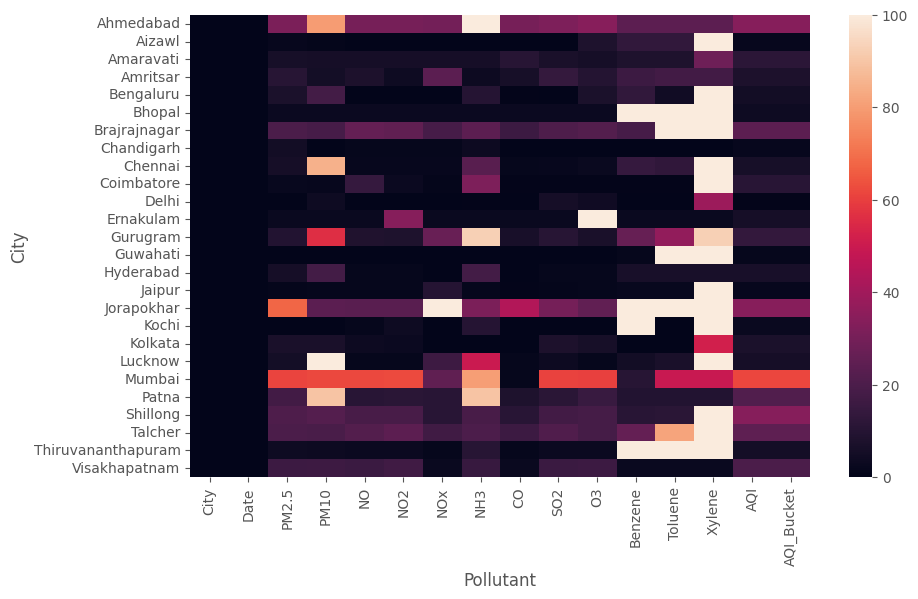

In [66]:
#visualizing percentage of missingness per city
plt.figure(figsize= (10,6))
sns.heatmap(missing_values_per_city_percent)
plt.xlabel('Pollutant')
plt.show()

In [67]:
#sort dataset
pollution_df= pollution_df.sort_values(['City', 'Date'],ascending= [True, True])

In [68]:
#feature engineering: datetime features
pollution_df['Date']= pd.to_datetime(pollution_df['Date'], errors= 'raise',format= '%d/%m/%Y')
pollution_df['year']= pollution_df['Date'].dt.year
pollution_df['month']= pollution_df['Date'].dt.month
pollution_df['day']= pollution_df['Date'].dt.day
pollution_df['Month name']= pollution_df['Date'].dt.month_name()


In [69]:
pollution_df['AQI_Bucket'].unique()

array([nan, 'Poor', 'Severe', 'Very Poor', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [70]:
#handling Missing Values: pollutants and AQI
pollutants = ["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3",
              "Benzene","Toluene","Xylene", "AQI"]
pollution_df[pollutants] = pollution_df.groupby(['City', 'month'])[pollutants].ffill().bfill()

#handling Missing Values: AQI_Bucket
def missing_bucket(row):
    if 0 < row['AQI'] <= 50:
        return 'Good'
    elif 50 < row['AQI'] <= 100:
        return 'Satisfactory'
    elif 100 < row['AQI'] <= 200:
        return 'Moderate'
    elif 200 < row['AQI'] <= 300:
        return 'Poor'
    elif 300 < row['AQI'] <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

pollution_df['AQI_Bucket'] = pollution_df['AQI_Bucket'].fillna(
    pollution_df.apply(missing_bucket, axis=1))

pollution_df.isna().sum()


,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


**Handling Missing Values**
Reviews by Gonzalez et al. (2016) and Jiang et al. (2020) emphasize that the choice of imputation method should consider both the percentage of missing data and the spatial-temporal patterns of monitoring stations. with Xylene variables having 100% missingness in almost all the cities, treating this may need careful treatment or exclusion to avoid bias, whereas features with lower missingness can be reliably imputed.

The dataset was first sorted by city and date to maintain a proper temporal order within each location. Missing values for pollutant columns and AQI were then filled using forward fill (ffill). This method carries the last available observation forward to fill subsequent missing entries.

To ensure that the imputation does not mix data across different locations or seasonal patterns, the forward fill was applied within groups defined by city and month. This approach prevents values from spilling over from one city or month to another, preserving the spatio-temporal integrity of the dataset.

**Rationale:**

Many pollutants show short-term persistence, so forward filling within the same city and month provides a reasonable estimate for missing measurements.

Grouping by city and month ensures that the imputed values reflect the local and seasonal context, rather than introducing bias from unrelated locations or months.

This method is particularly useful when missing values are scattered rather than clustered, which is the case for pollutants like PM2.5, PM10, and AQI.

**Impact on Analysis:**

Missing values are now accounted for, enabling accurate exploratory data analysis (EDA), correlation studies, and machine learning modeling.

The method maintains temporal and spatial consistency, which is critical when predicting AQI_Bucket or analyzing pollutant trends.

In [71]:

pollution_df.to_csv('cleaned_pollution_dataset.csv', index= False)

In [72]:

pollution_df.head(20)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day,Month name
25354,Ahmedabad,2015-01-01,84.46,131.62,0.92,18.22,17.15,32.95,0.92,27.64,133.36,0.00,0.02,0.00,278.0,Poor,2015,1,1,January
25719,Ahmedabad,2016-01-01,84.46,131.62,0.92,18.22,17.15,32.95,0.92,27.64,133.36,0.00,0.02,0.00,278.0,Poor,2016,1,1,January
26085,Ahmedabad,2017-01-01,84.46,131.62,0.92,18.22,17.15,32.95,0.92,27.64,133.36,0.00,0.00,0.00,278.0,Poor,2017,1,1,January
26450,Ahmedabad,2018-01-01,84.46,131.62,7.58,87.62,48.40,32.95,7.58,102.36,69.02,14.48,45.60,6.33,278.0,Poor,2018,1,1,January
26815,Ahmedabad,2019-01-01,110.71,131.62,63.03,111.56,100.04,32.95,63.03,80.15,57.12,4.08,32.33,6.93,1474.0,Severe,2019,1,1,January
27180,Ahmedabad,2020-01-01,79.57,131.62,3.78,12.64,8.99,32.95,3.78,27.70,23.67,4.21,31.42,2.52,216.0,Poor,2020,1,1,January
25385,Ahmedabad,2015-02-01,135.99,125.19,43.48,42.08,84.57,32.95,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe,2015,2,1,February
25750,Ahmedabad,2016-02-01,135.99,125.19,43.48,42.08,84.57,32.95,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe,2016,2,1,February
26116,Ahmedabad,2017-02-01,135.99,125.19,43.48,42.08,84.57,32.95,43.48,75.23,102.70,0.00,0.00,0.00,782.0,Severe,2017,2,1,February
26481,Ahmedabad,2018-02-01,189.12,125.19,94.00,178.13,160.97,32.95,94.00,168.44,39.06,0.74,5.81,3.21,1613.0,Severe,2018,2,1,February


In [73]:
pollution_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,29531,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,29531.0,64.70156,0.04,27.5,47.17,78.325,949.99,61.759609
PM10,29531.0,121.081469,0.01,57.82,99.64,164.71,1000.0,85.983751
NO,29531.0,17.561958,0.02,5.83,10.26,20.66,390.68,21.967804
NO2,29531.0,27.80879,0.01,11.32,20.95,36.74,362.21,24.204886
NOx,29531.0,35.191995,0.0,13.22,24.47,43.425,467.63,34.481116
NH3,29531.0,24.361278,0.01,9.21,18.24,32.95,352.89,24.878874
CO,29531.0,2.449416,0.0,0.51,0.91,1.5,175.81,7.447607
SO2,29531.0,15.122767,0.01,5.82,9.38,15.59,193.86,19.05439
O3,29531.0,33.491782,0.01,18.06,29.67,44.3,257.73,21.453751


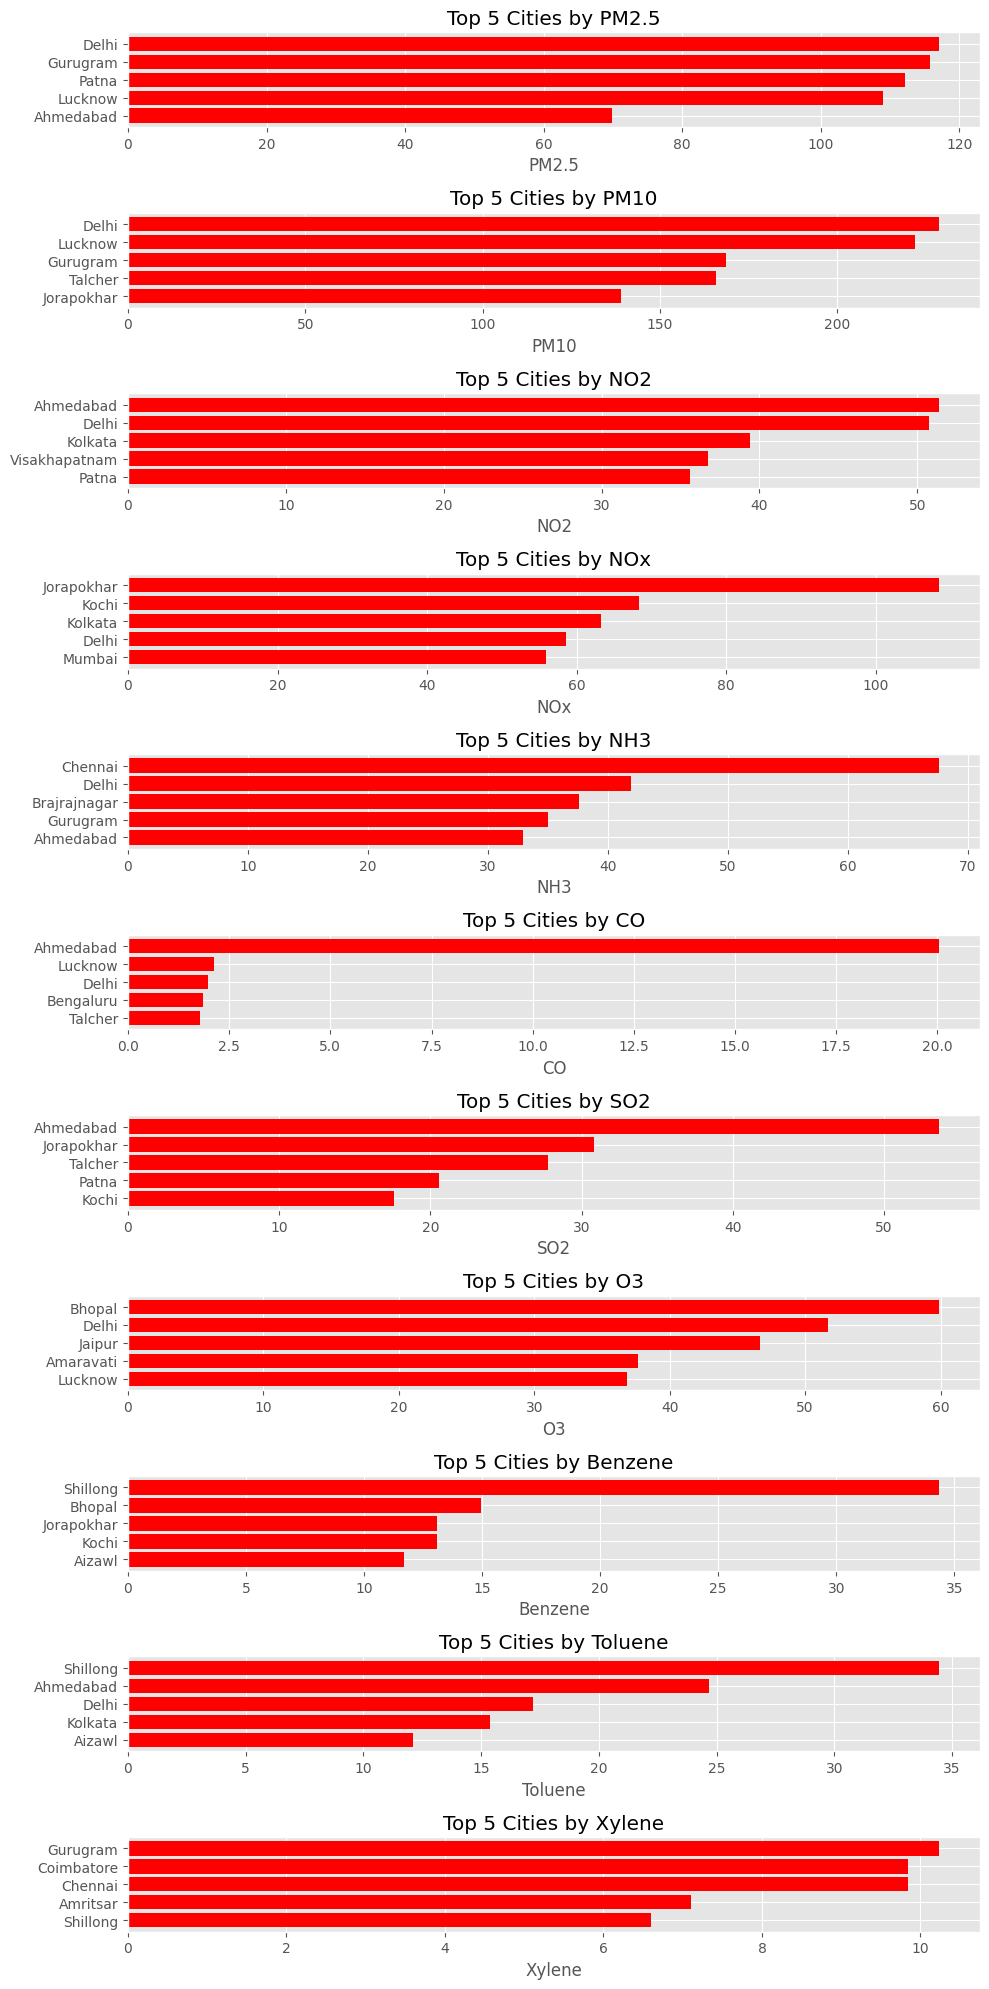

'Figure 1: Visualizing the top 5 cities by mean pollutant level.'

In [74]:
plt.style.use('ggplot')

pollutant_columns = ['PM2.5','PM10','NO2','NOx','NH3','CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']

#Group by station and calculate mean pollutant concentrations
mean_pollutant_by_city =pollution_df.groupby('City')[pollutant_columns].mean()
#print(mean_pollutant_by_city)

#Find the top 5 stations for each pollutant
top_city = {}
for pollutant in pollutant_columns:
    top_city[pollutant] = mean_pollutant_by_city[pollutant].sort_values(ascending=False).head(5)
#print(top_city)

# Step 3: Plotting
fig, axes = plt.subplots(len(pollutant_columns), 1, figsize=(10, 20))

for i, pollutant in enumerate(pollutant_columns):
    axes[i].barh(top_city[pollutant].index, top_city[pollutant].values, color='red')
    axes[i].set_title(f'Top 5 Cities by {pollutant}')
    axes[i].set_xlabel(f'{pollutant}')
    axes[i].invert_yaxis()  # Highest values on top

plt.tight_layout()
plt.show()

'''Figure 1: Visualizing the top 5 cities by mean pollutant level.'''

Figure 1 shows visualisation of top five cities by each average pollutant level. The dataset was aggregated by city to compute average concentrations for each pollutant.

Observations:

Cities like Delhi, Ahmedabad, gurugram, shilong and Lucknow consistently showed higher pollutant concentrations across multiple variables.

Particulate matter (PM2.5, PM10) were notably high in these cities, reflecting dense urbanization and industrial activity.

Implications:

These findings can guide targeted air quality monitoring and pollution mitigation efforts.


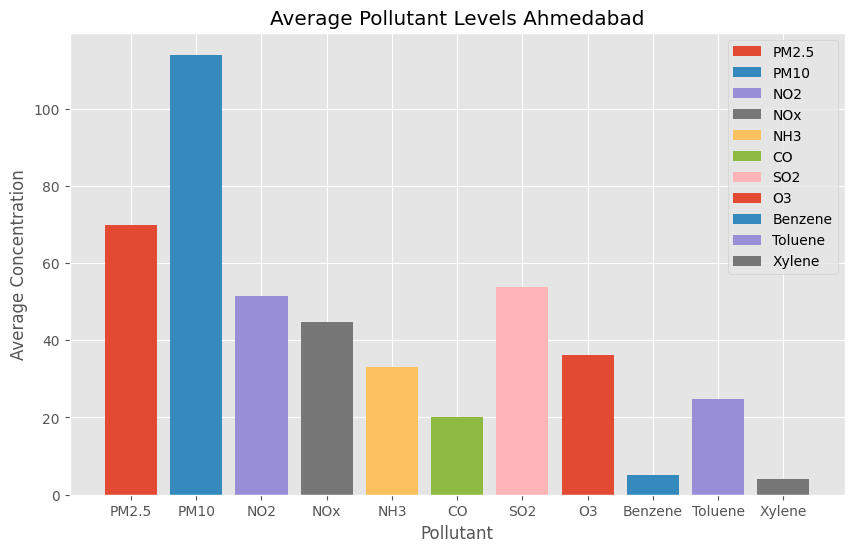

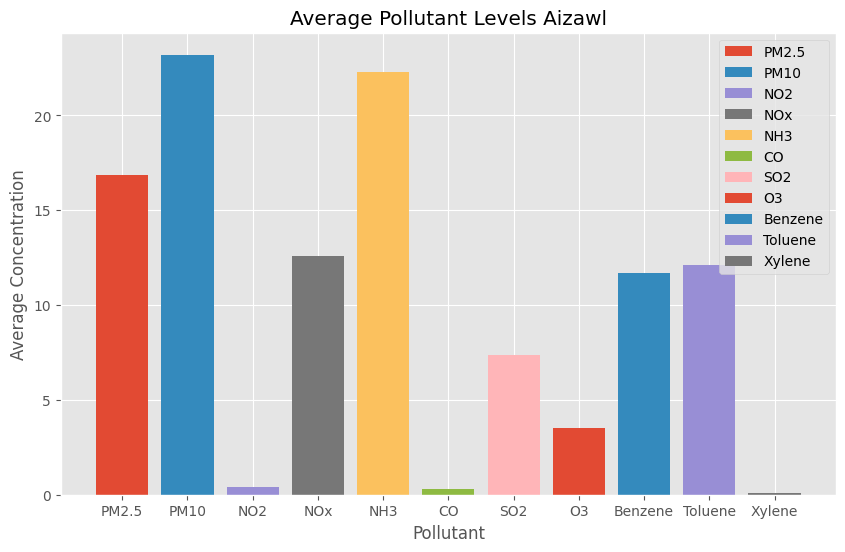

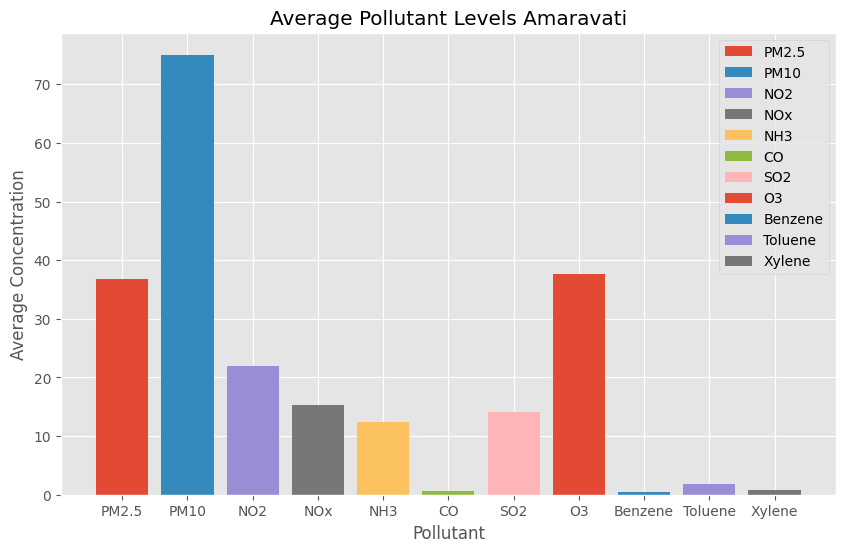

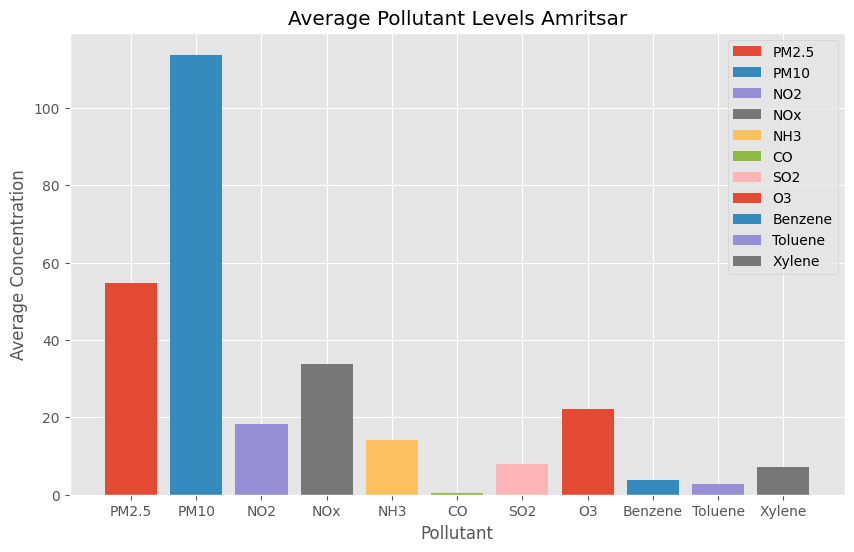

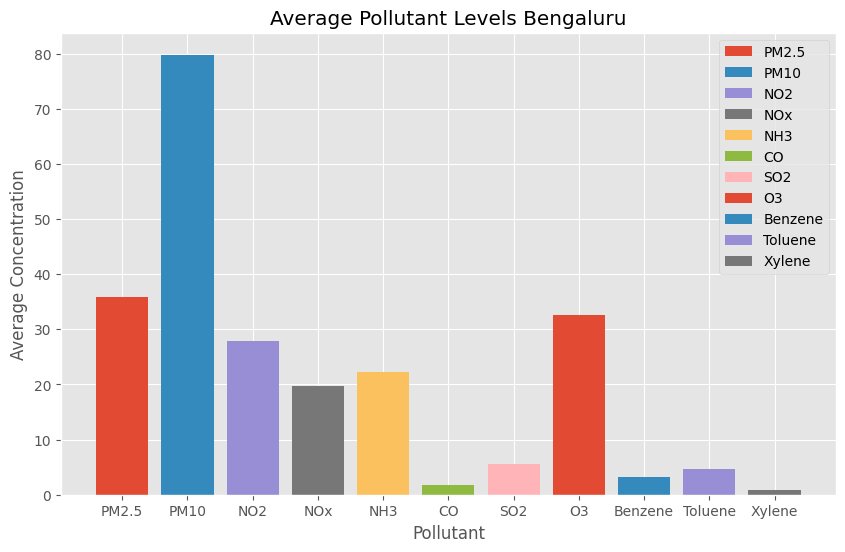

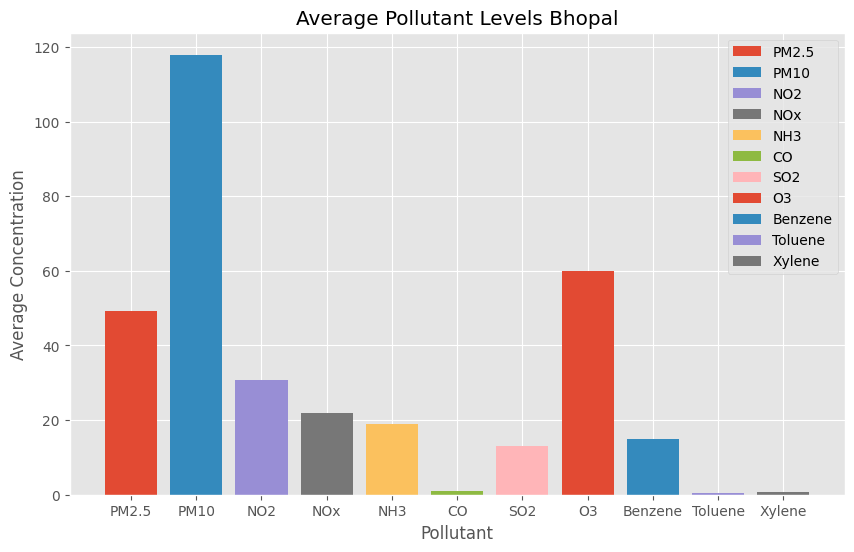

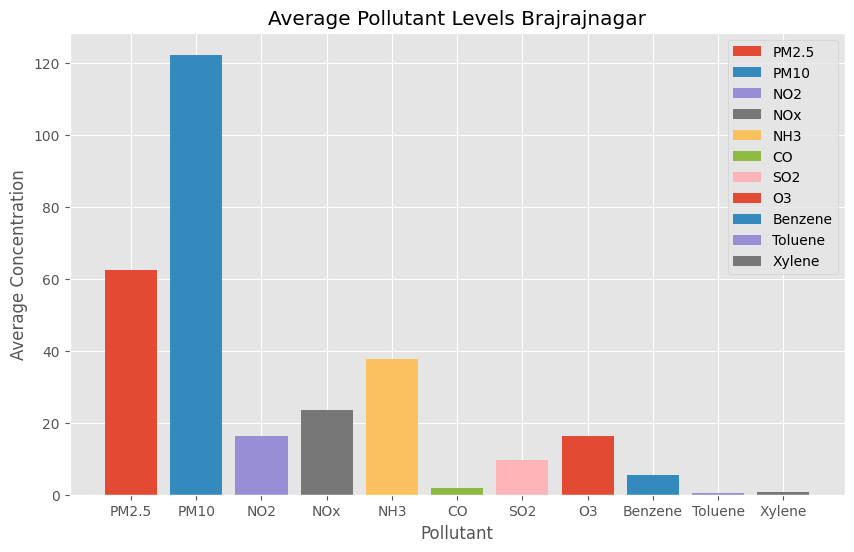

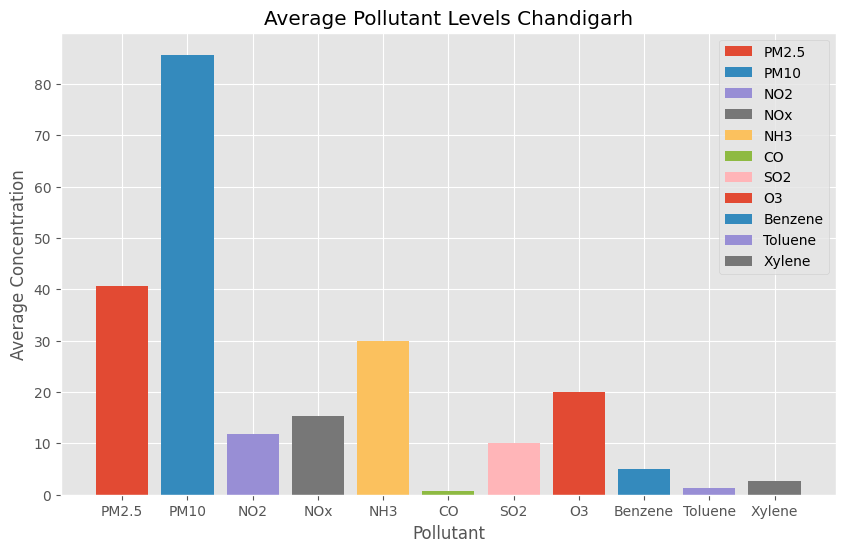

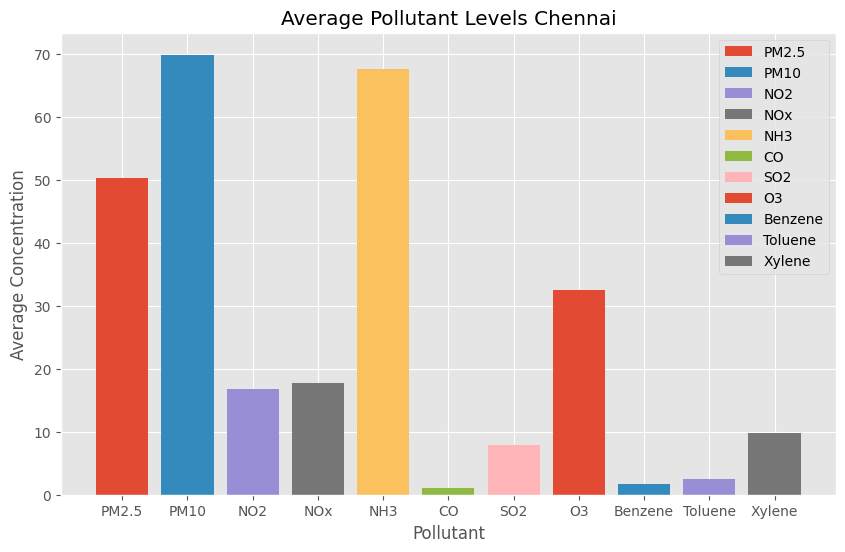

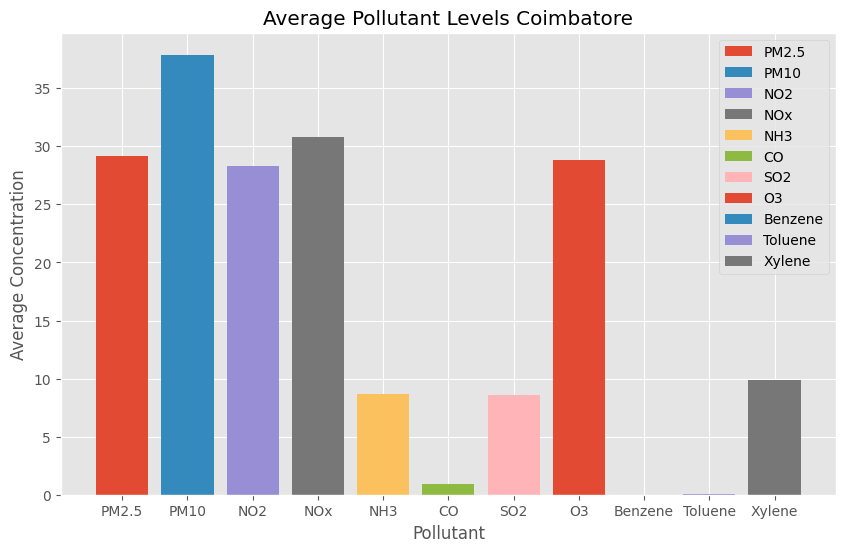

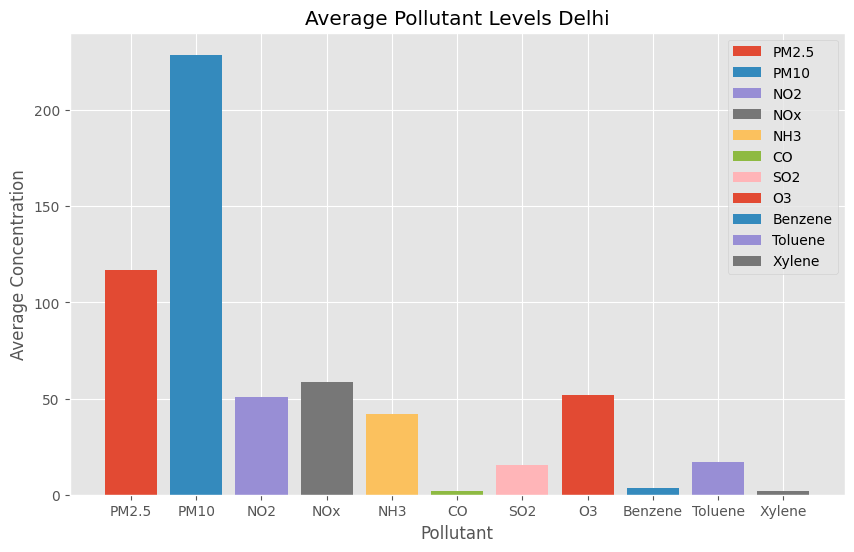

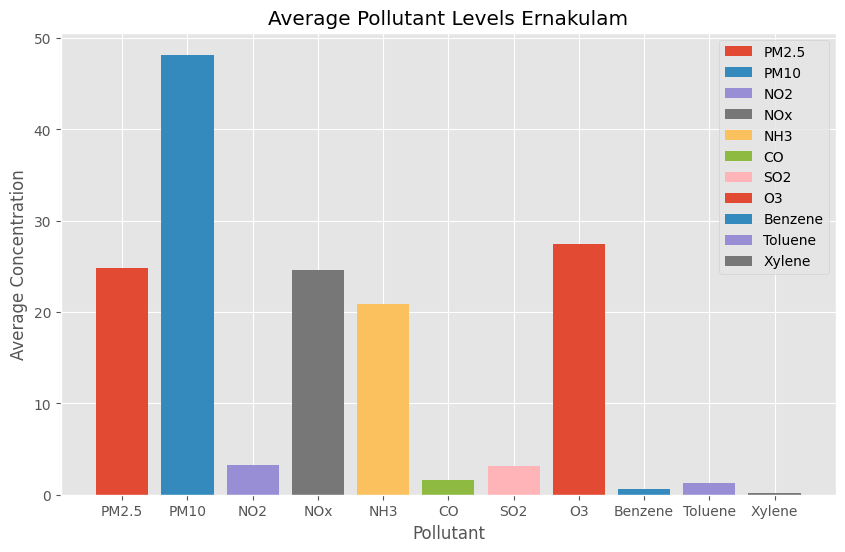

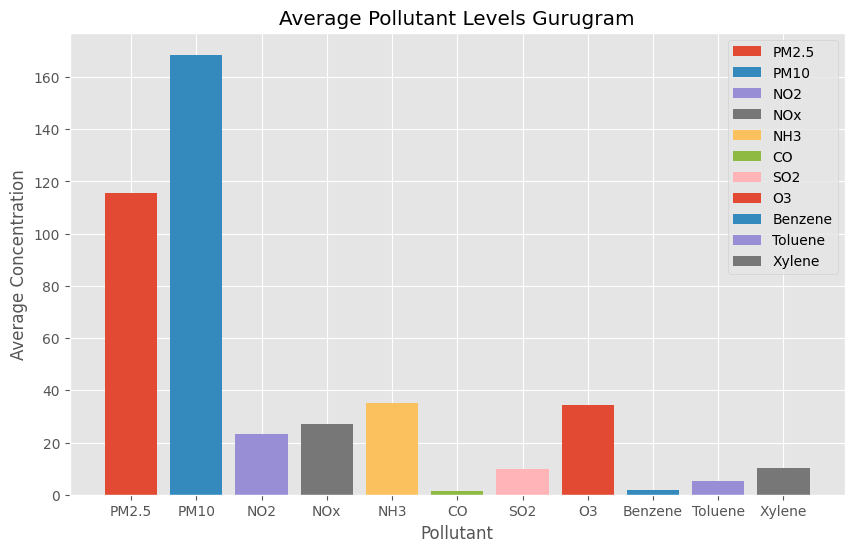

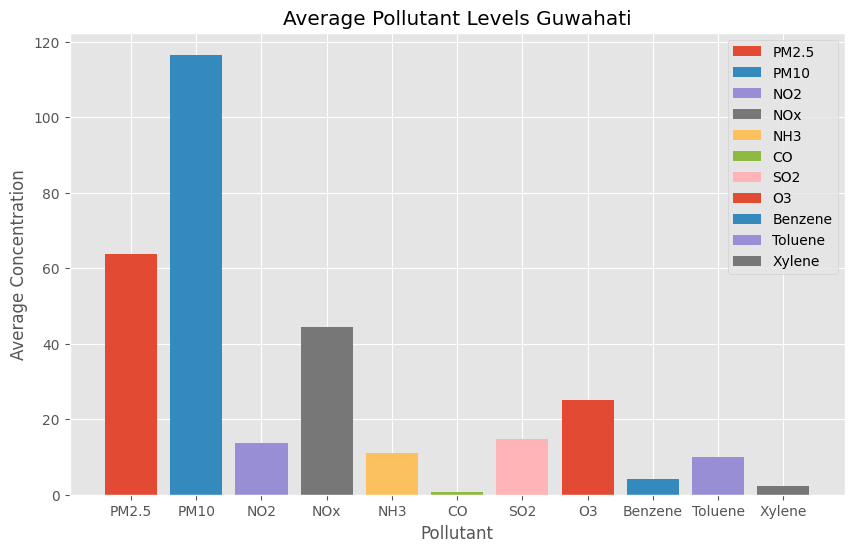

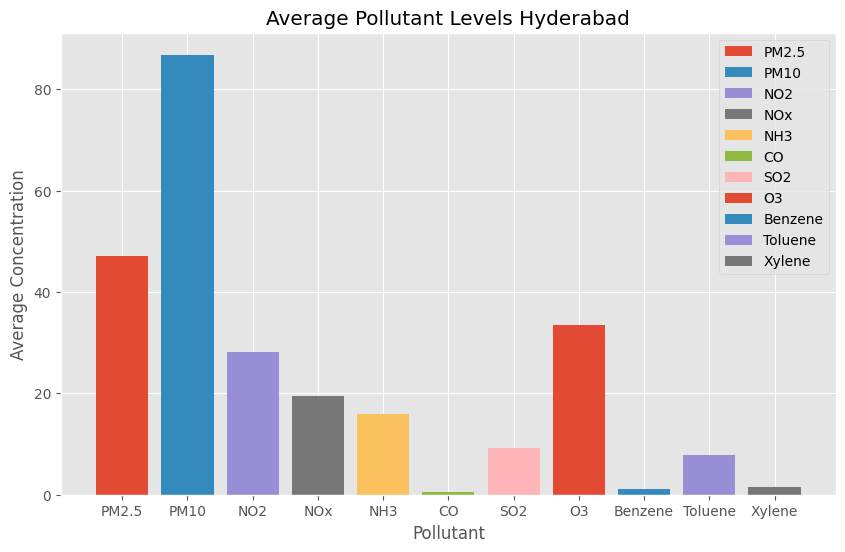

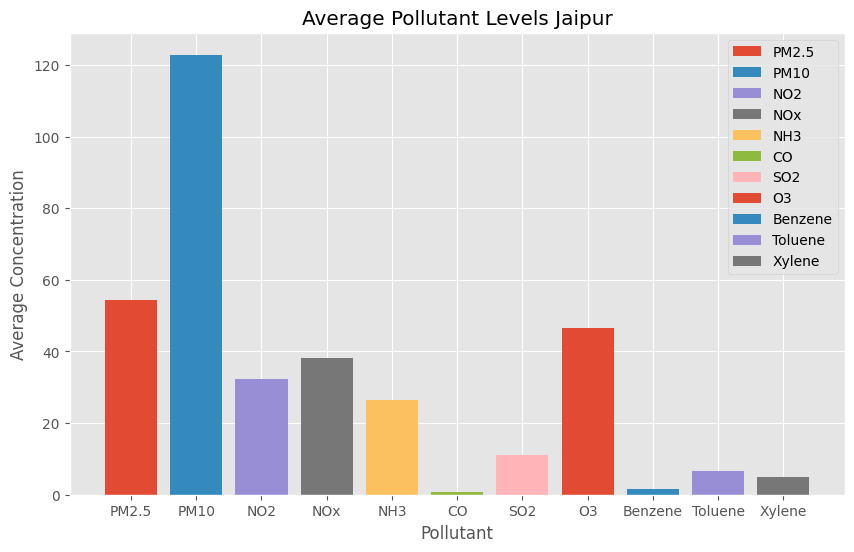

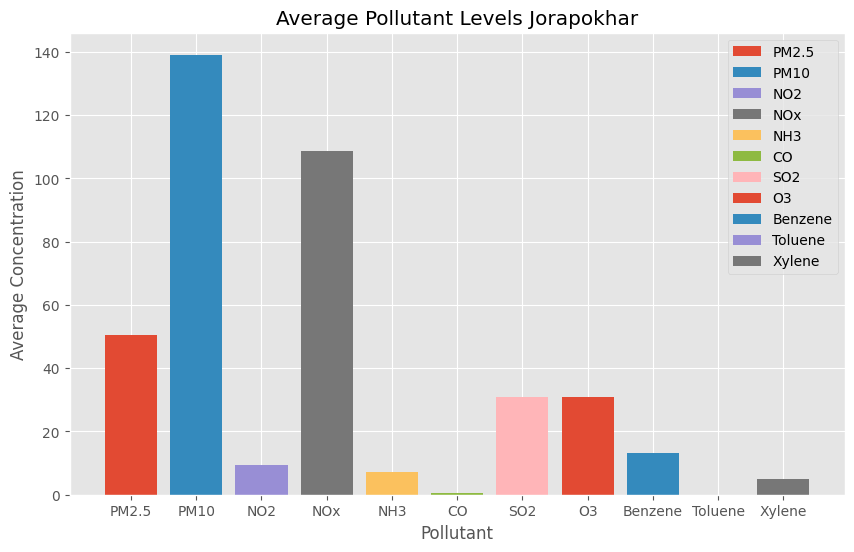

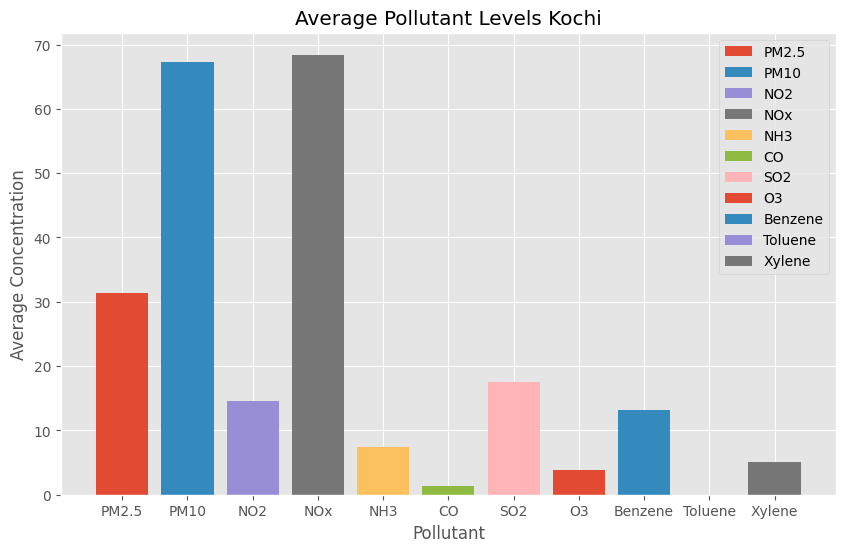

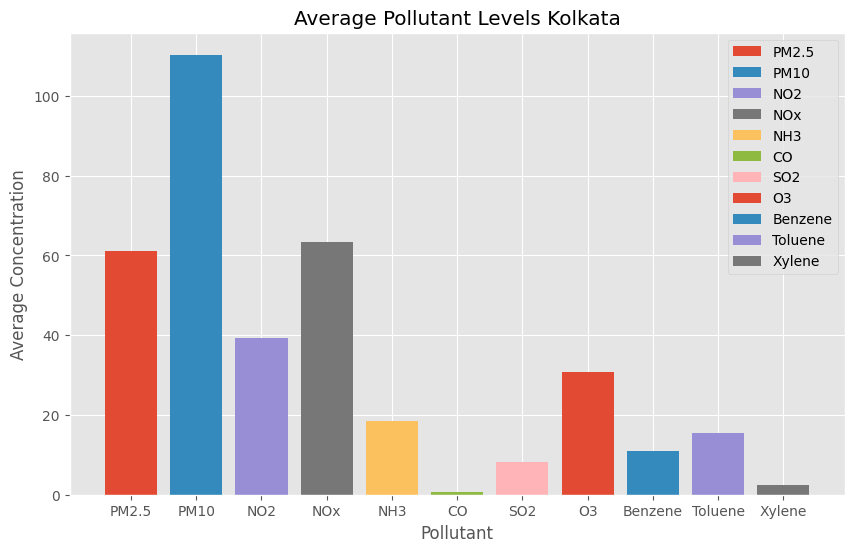

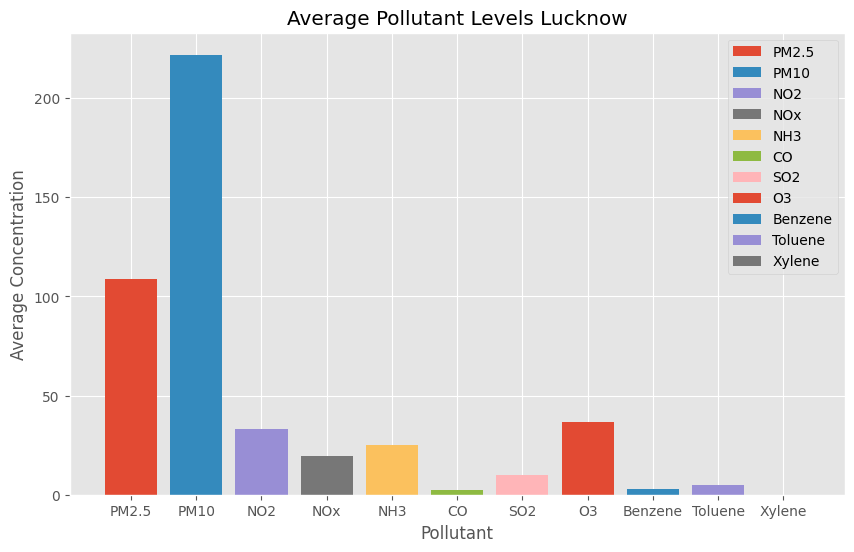

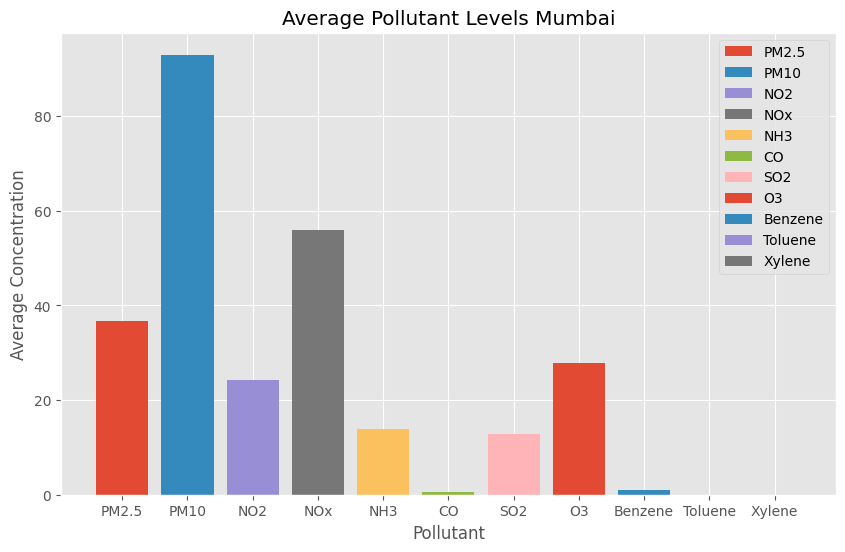

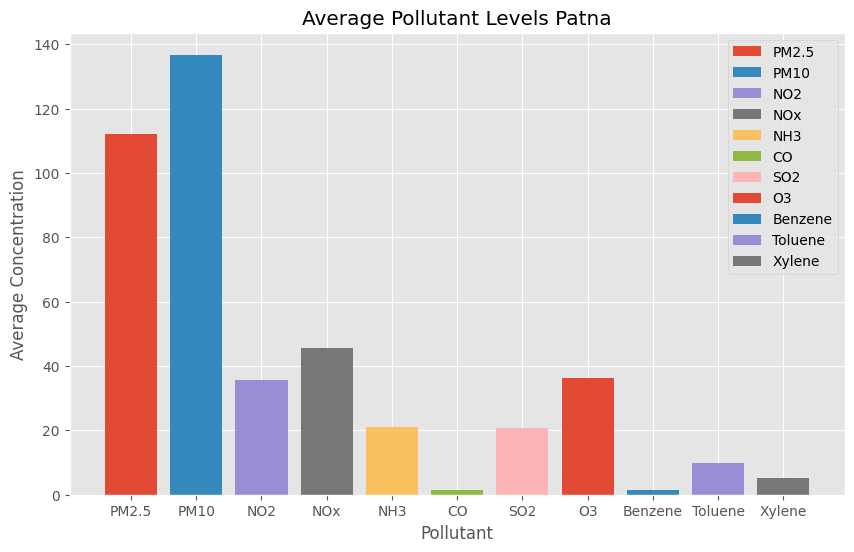

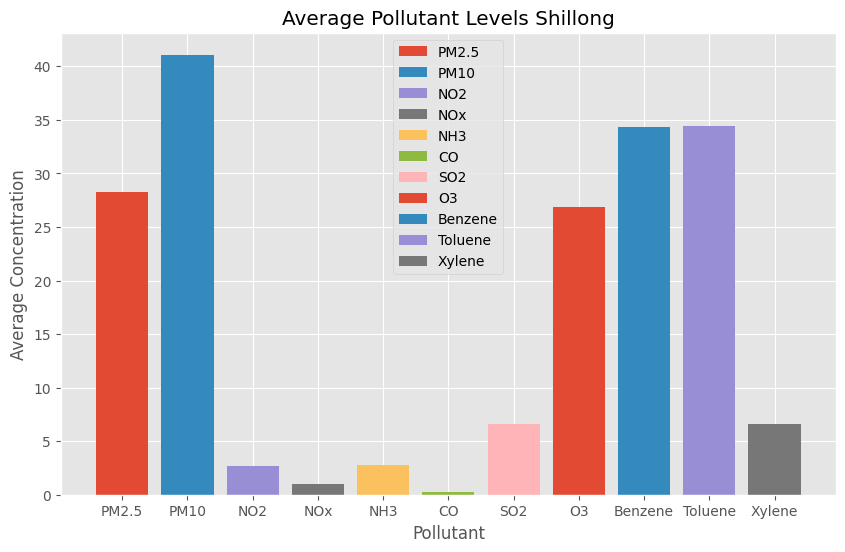

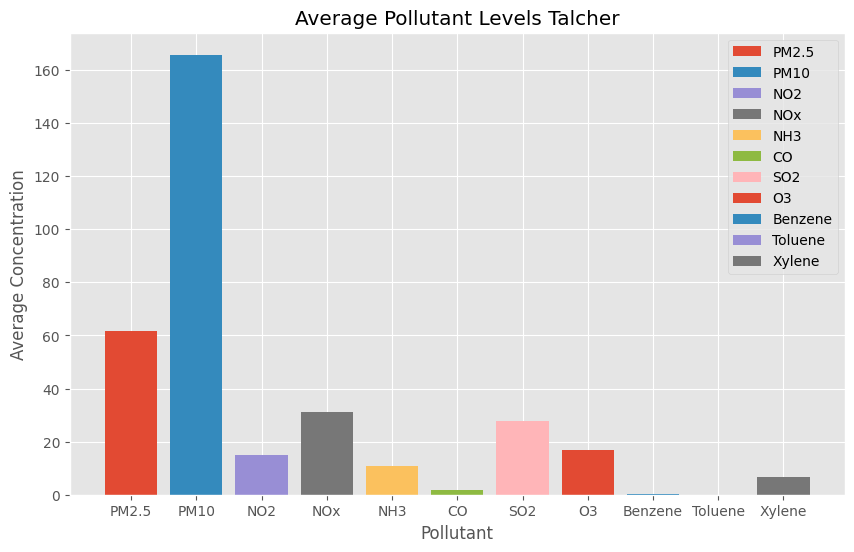

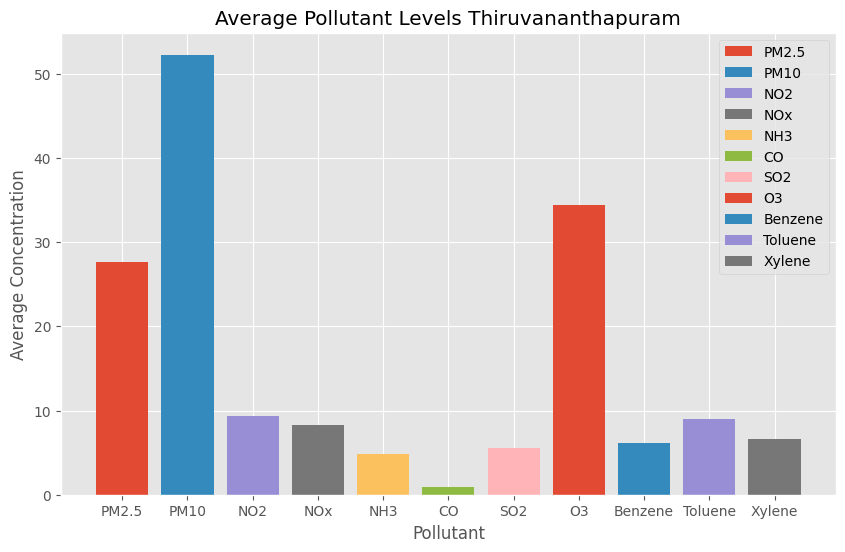

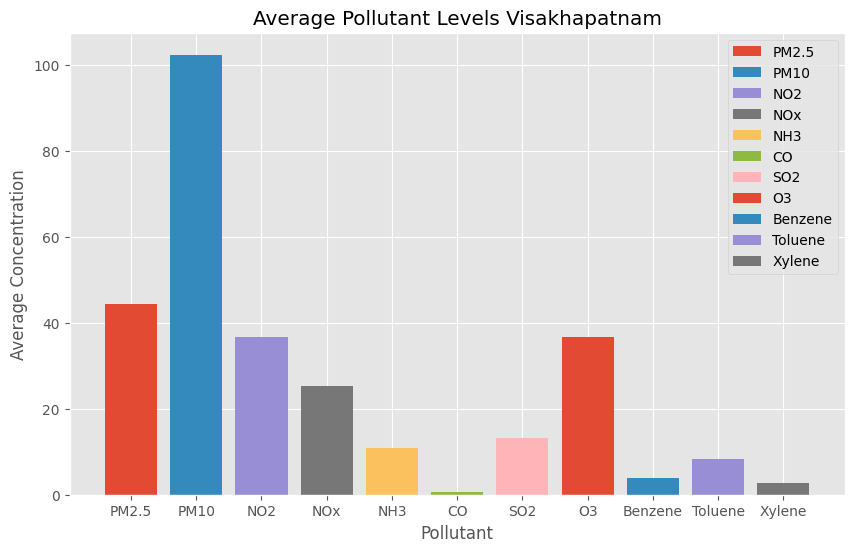

'Figure 2: Visualizing the average pollutant level by city.'

In [75]:
# Visualize average pollutant level by city
pollutants = ['PM2.5','PM10','NO2','NOx','NH3','CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
cities = pollution_df['City'].unique()

for city in cities:
    city_data = pollution_df[pollution_df['City'] == city]
    plt.figure(figsize=(10, 6))
    for pollutant in pollutants:
        plt.bar(pollutant, city_data[pollutant].mean(), label=pollutant)
    plt.title(f'Average Pollutant Levels {city}')
    plt.xlabel('Pollutant')
    plt.ylabel('Average Concentration')
    plt.legend()
    plt.show()

'''Figure 2: Visualizing the average pollutant level by city.'''


Average Pollutant Levels by City

The average concentration of each pollutant was calculated for every city to compare overall air quality across locations. This aggregation highlights clear differences in pollution intensity between cities.

The results show that larger and more industrialised cities like Mubai, Ahmedabad and Gurugram tend to have higher average levels of particulate matter (PM2.5 and PM10) and gaseous pollutants such as NO₂, NOx, and CO. These high averages reflect sustained pollution exposure. In contrast, smaller or less industrialised cities generally exhibit lower average pollutant concentrations.

This city-level comparison provides a clear overview of long-term pollution patterns and helps identify high-risk urban areas that may require targeted air quality management and policy interventions.

In [76]:
city_stats = pollution_df.groupby('City')[pollutants].mean().reset_index()

import plotly.express as px

# Melt the DataFrame to create a 'Pollutant' column
city_stats_melted = city_stats.melt(id_vars='City',
                               value_vars=pollutants,
                               var_name='Pollutant',
                               value_name='Average Concentration')

# Create the stacked bar chart
fig_cities= px.bar(city_stats_melted,
                     x='City',
                     y='Average Concentration',
                     color='Pollutant', # Use 'Pollutant' for color differentiation
                     title='Average Pollution Levels by City (Stacked)',
                     labels={'City': 'Cities', 'Average Concentration': 'Average Concentration'},
                     barmode='stack')

fig_cities.show()

'''Figure 3: Visualizing the average pollutant levels by city using a stacked bar chart.'''

'Figure 3: Visualizing the average pollutant levels by city using a stacked bar chart.'

Figure 3 shows substantial differences in air pollution levels across cities, with particulate matter (PM2.5 and PM10) contributing the largest share of total pollution in most locations. Major metropolitan cities such as Delhi, Ahmedadab, and Lucknow stand out with noticeably higher overall concentrations, indicating more severe air quality challenges. In contrast, smaller cities display relatively lower pollutant levels, highlighting the strong link between urbanisation, traffic density, and industrial activity and increased air pollution.

In [77]:
pollutants = ['PM2.5','PM10','NO2','NOx','NH3','CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
total_pollutant_concentration = pollution_df[pollutants].mean().sum()  # Calculates total concentration across all pollutants

# Calculate percentage for each pollutant
pollutant_percentages = [(pollution_df[pollutant].mean() / total_pollutant_concentration) * 100 for pollutant in pollutants]

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
perc_pol= px.pie(values= pollutant_percentages,names=pollutants, hole= 0.3,title= 'Percentage of Pollutants')
perc_pol.show()

'''Figure 4: Visualizing the percentage of each pollutant in the dataset.'''

'Figure 4: Visualizing the percentage of each pollutant in the dataset.'

<Figure size 800x800 with 0 Axes>

The pie chart illustrates the percentage contribution of different pollutants to overall mean air pollution. It shows that PM10 (about 35.7%) and PM2.5 (around 19.1%) dominate the pollution profile, together accounting for more than half of total pollutant concentration. Gaseous pollutants such as NOx, O₃, and NO₂ contribute a moderate share, while CO, SO₂, benzene, toluene, and xylene make relatively minor contributions. Overall, the chart highlights that particulate matter is the primary driver of air pollution, suggesting that control strategies should prioritise reducing PM emissions

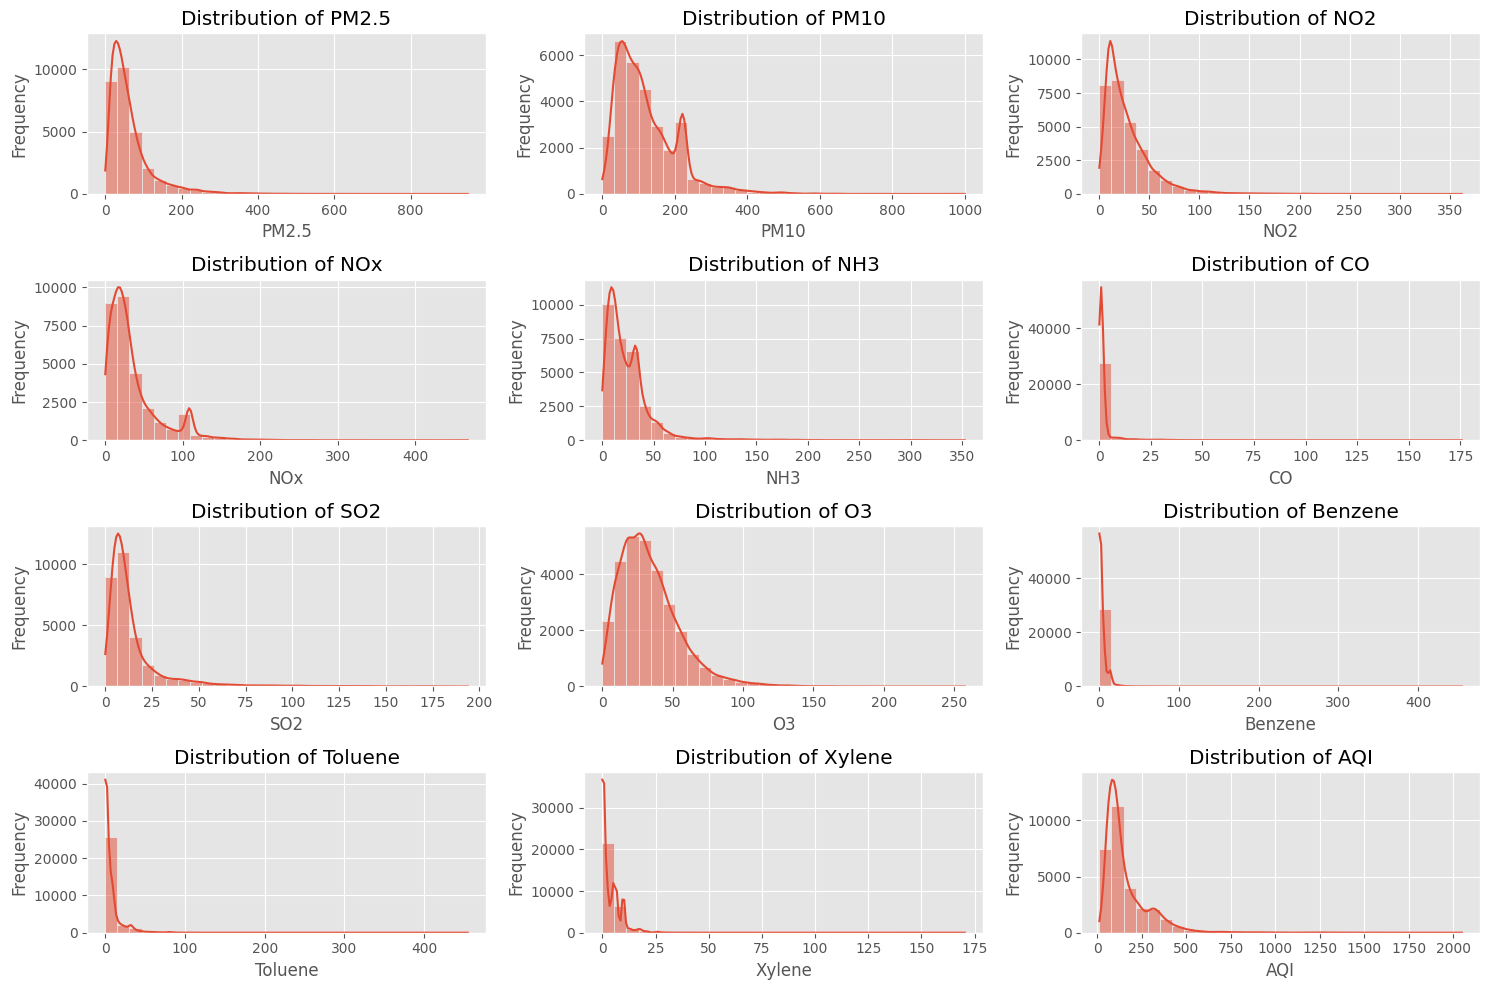

In [78]:
key_variables = ['PM2.5','PM10','NO2','NOx','NH3','CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

plt.figure(figsize=(15, 10))
for i, column in enumerate(key_variables, 1): # the subplot starts from index 1 and not from 0
  plt.subplot(4, 3, i)
  sns.histplot(pollution_df[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The set of histograms shows that most air pollutants have highly right-skewed distributions, meaning that low to moderate concentrations occur frequently, while extreme pollution events are less common but significant. Particulate matter (PM2.5 and PM10) and gaseous pollutants such as NO₂ and NOx exhibit long tails, indicating occasional very high concentration spikes. Pollutants like CO, benzene, toluene, and xylene are concentrated at low levels with sharp peaks near zero, suggesting sporadic but intense emissions. Overall, the AQI distribution mirrors this pattern, highlighting that air quality is generally moderate but periodically deteriorates to hazardous levels*, which has important public health implications.

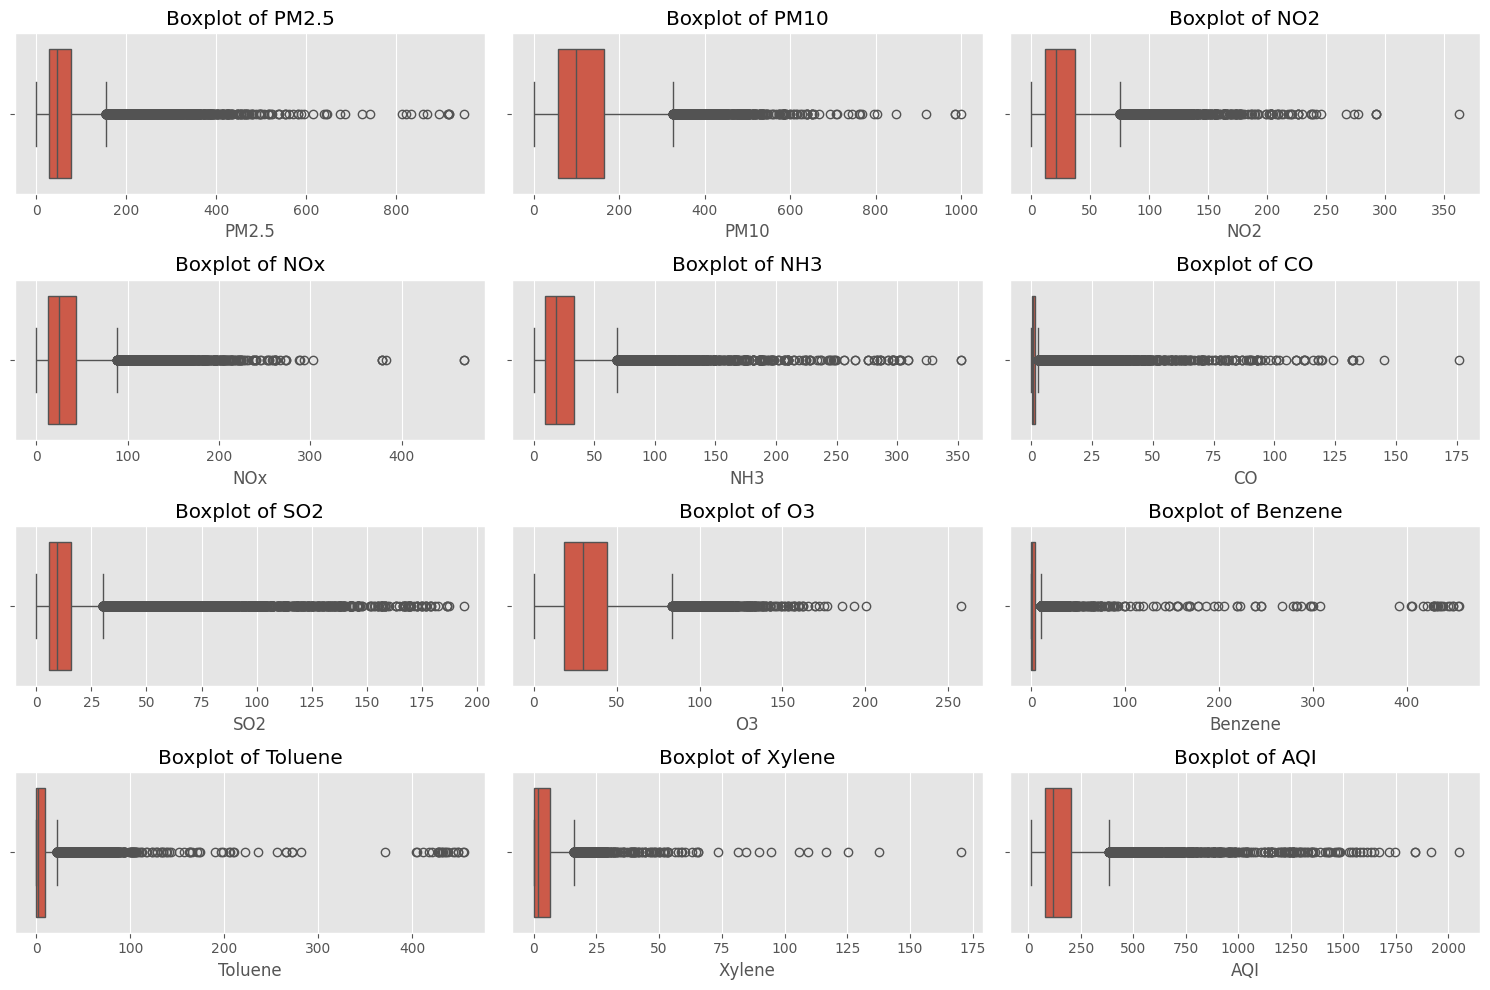

In [79]:
key_variables = ['PM2.5','PM10','NO2','NOx','NH3','CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

plt.figure(figsize=(15, 10))
for i, column in enumerate(key_variables, 1): # the subplot starts from index 1 and not from 0
  plt.subplot(4, 3, i)
  sns.boxplot(x= pollution_df[column])
  plt.title(f'Boxplot of {column}')
  plt.xlabel(column)
plt.tight_layout()
plt.show()

In [80]:
# Defining a function to determine the season based on the month
def get_season(month):
  if month<= 2 or month==12:
    return 'Winter'
  elif 3<= month <= 6:
    return 'Summer'
  elif 7 <= month <= 9:
    return 'Monsoon'
  else:
    return 'Post Monsoon'

# Apply the function to the 'month' column and create a new 'Season' column
pollution_df['Season'] = pollution_df['month'].apply(get_season)

pollution_df.reset_index(inplace=True) #resetting the index to be true
#pollution_df.head()


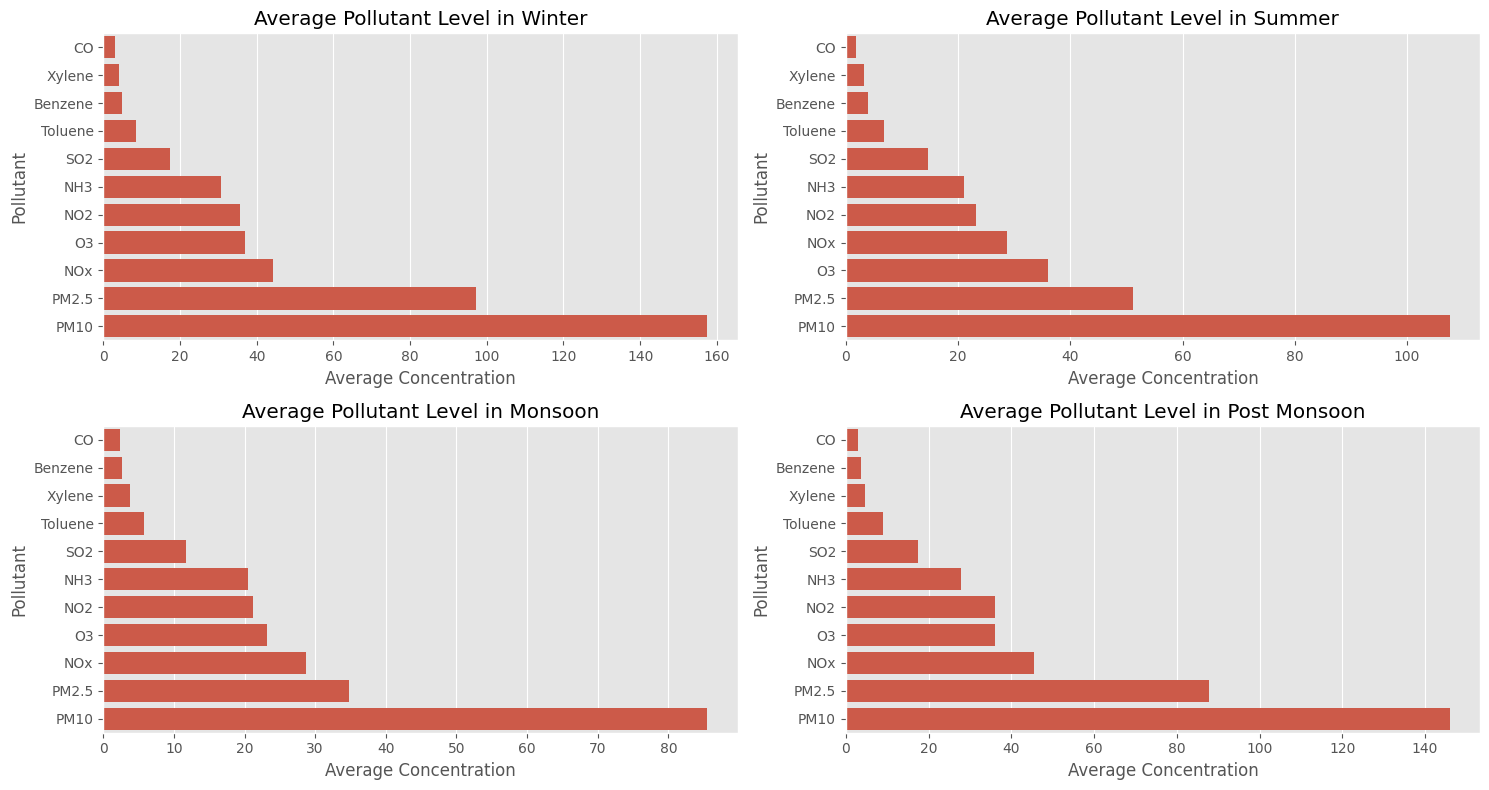

In [81]:
# Group by season and calculate average pollutant concentrations
pollutants = ['PM2.5','PM10','NO2','NOx','NH3','CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
seasonal_avg = pollution_df.groupby('Season')[ pollutants].mean().reset_index()
# Melt the DataFrame for visualization
seasonal_avg_melted = seasonal_avg. melt(id_vars='Season', var_name='Pollutant', value_name='Average Concentration')
seasons= pollution_df['Season'].unique()
plt.figure(figsize= (15, 8))
for i, season in enumerate(seasons, 1):
  plt.subplot(2,2,i)
  val= seasonal_avg_melted[seasonal_avg_melted['Season']== season].sort_values('Average Concentration')
  sns.barplot(val, x='Average Concentration', y= 'Pollutant')
  plt.title(f'Average Pollutant Level in {season}')
plt.tight_layout()
plt.show()





The visualisation compares the average concentration of major air pollutants across four distinct Indian seasons: Winter, Summer, Monsoon, and Post-Monsoon. This seasonal breakdown aligns with the climatological classification commonly used in Indian air quality studies (Guttikunda & Gurjar, 2012)

**Winter**

During winter, concentrations of PM10, PM2.5, NOx, and NO₂ are highest, reflecting poor atmospheric dispersion caused by low temperatures and weak winds which trap pollutants near the surface (Tiwari et al., 2019). These conditions are known to increase particulate pollution in Indian cities.

**Summer**

In summer, particulate matter levels decline due to stronger winds and increased boundary-layer height; however, ozone (O₃) concentrations rise as higher temperatures and solar radiation enhance photochemical reactions involving NOx and volatile organic compounds (Sharma et al., 2017). This seasonal shift highlights the role of meteorology in pollutant formation rather than emissions alone

**Monsoon**

The monsoon season shows the lowest pollution levels, particularly for PM10 and PM2.5, due to effective wet deposition and atmospheric cleansing by rainfall (Kumar et al., 2020).

**Post Monsoon**

the post-monsoon period records a resurgence in particulate matter and nitrogen oxides, largely attributed to agricultural residue burning and reduced rainfall (Cusworth et al., 2018).

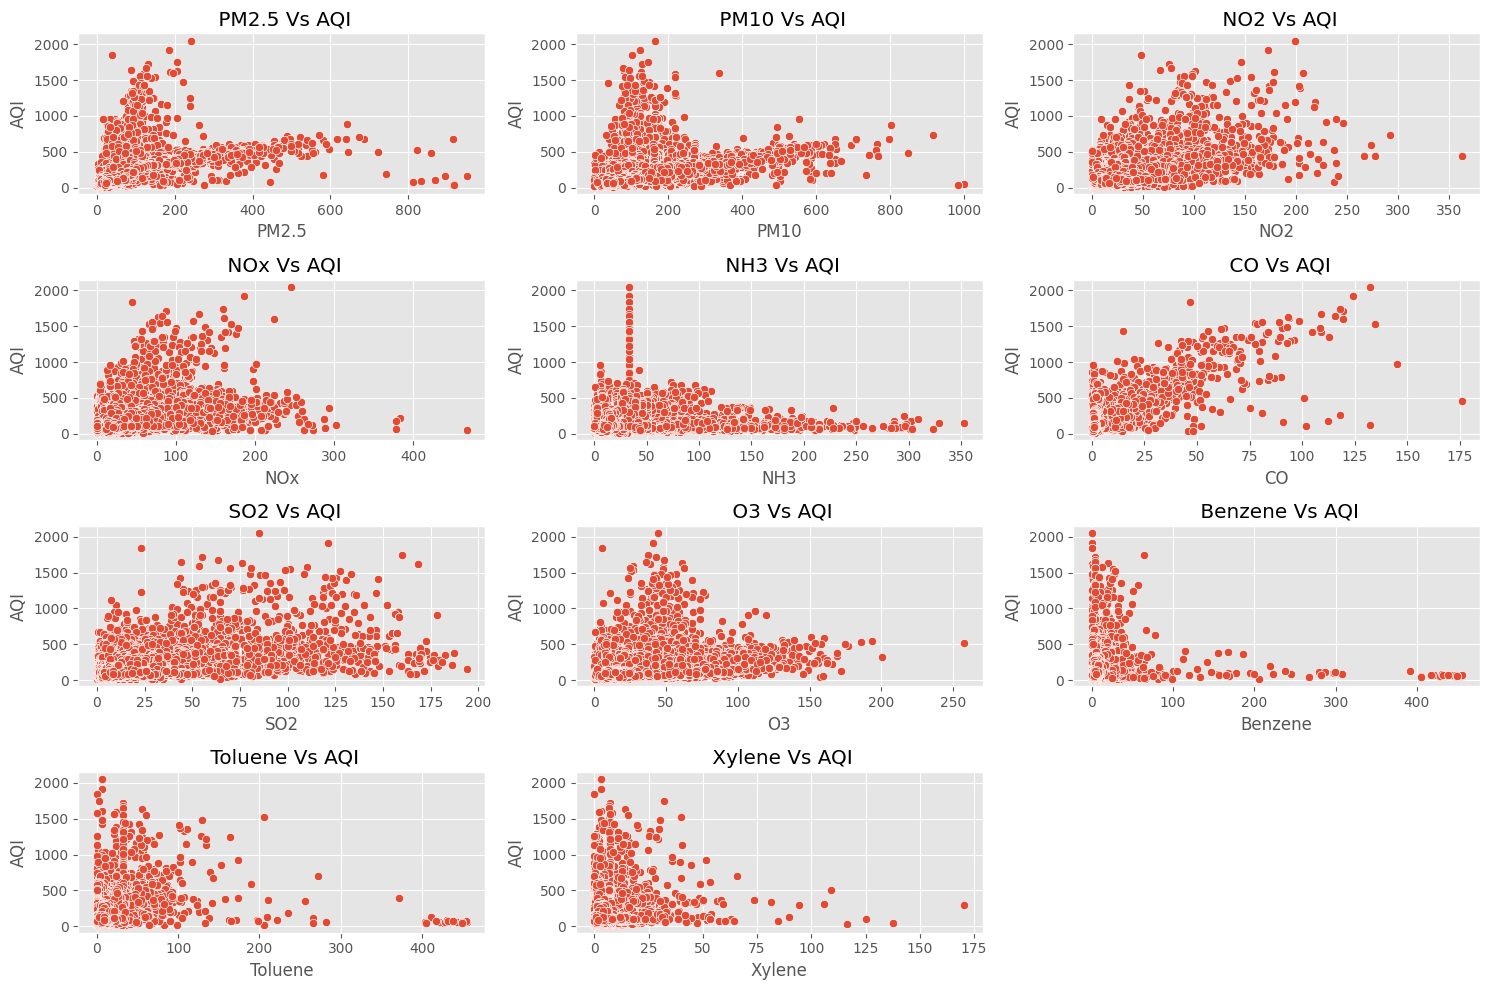

In [82]:
# relationship between AQI and each pollutant in each city
pollutants = ['PM2.5','PM10','NO2','NOx','NH3','CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']
plt.figure(figsize= (15, 10))
for i, pollutant in enumerate(pollutants, 1):
  plt.subplot(4,3,i)
  sns.scatterplot(pollution_df,x= pollutant, y='AQI')
  plt.title(f' {pollutant} Vs AQI')
plt.tight_layout()
plt.show()



